In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import missingno as msno
import numpy as np
from scipy.stats import norm

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the plot configuration

pd.options.mode.chained_assignment = None

#read in the data
df = pd.read_csv(r'C:\Users\M_Joh\Data Class - Python\movies.csv', sep=',', engine='python')

In [2]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


budget - %0.0
company - %0.0
country - %0.0
director - %0.0
genre - %0.0
gross - %0.0
name - %0.0
rating - %0.0
released - %0.0
runtime - %0.0
score - %0.0
star - %0.0
votes - %0.0
writer - %0.0
year - %0.0


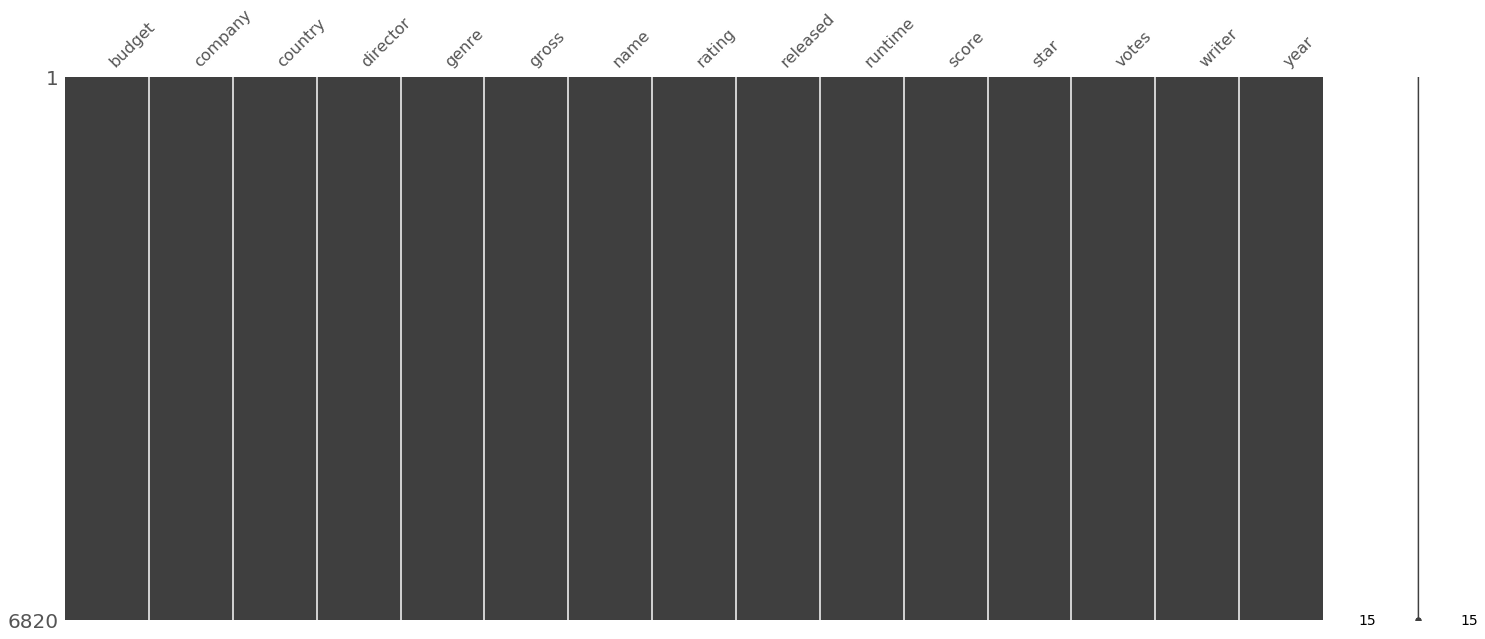

In [3]:
#Identifying missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - %{}'.format(col, pct_missing))
#visualizing missing data
msno.matrix(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001684ECC6708>,
      dtype=object)

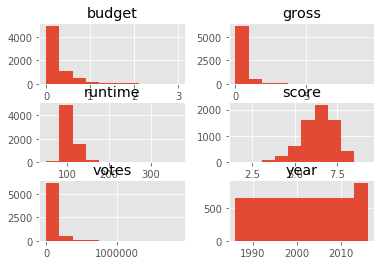

In [4]:
hist = df.hist()
hist

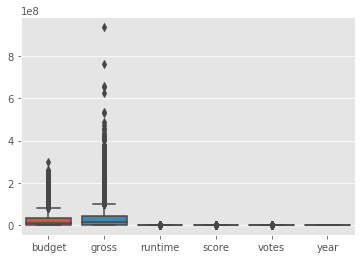

In [5]:
sns.boxplot(data = df)

In [6]:
df.dtypes

budget        int64
company      object
country      object
director     object
genre        object
gross         int64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [7]:
df['year_correct'] = df['released'].str.split('/').str[2]

In [8]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986


In [9]:
#check for duplicates
df[df.duplicated() == True]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct


In [10]:
pd.options.display.max_rows=30
df.sort_values(by=['gross'], inplace=False, ascending = False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,12/18/2015,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,12/18/2009,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,12/19/1997,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,6/12/2015,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,5/4/2012,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,4/12/2013,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,3/9/2012,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,1/19/2014,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,10/1/1997,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


In [11]:
#hypothesis: budget, company has a high correlation with gross

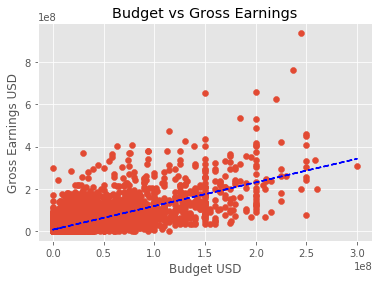

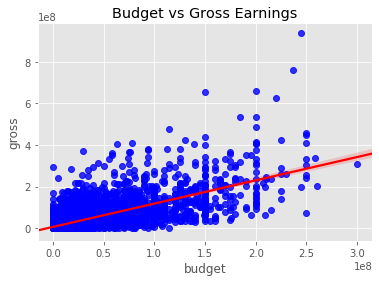

In [12]:
x = df['budget']
y = df['gross']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"b--")
# the line equation:
plt.title("Budget vs Gross Earnings")
plt.ylabel("Gross Earnings USD")
plt.xlabel("Budget USD")
plt.show()

sns.regplot(data=df, x="budget", y="gross", scatter_kws={"color":"blue"}, line_kws={'color':'red'}).set_title("Budget vs Gross Earnings")
plt.show()

In [13]:
#print(df.corr(method = 'kendall'))
print(df.corr(method = 'pearson'))
#print(df.corr(method = 'spearman'))
#using pearson correlation

           budget     gross   runtime     score     votes      year
budget   1.000000  0.712196  0.268226  0.042145  0.503924  0.291009
gross    0.712196  1.000000  0.224579  0.165693  0.662457  0.191548
runtime  0.268226  0.224579  1.000000  0.395343  0.317399  0.087639
score    0.042145  0.165693  0.395343  1.000000  0.393607  0.105276
votes    0.503924  0.662457  0.317399  0.393607  1.000000  0.229304
year     0.291009  0.191548  0.087639  0.105276  0.229304  1.000000


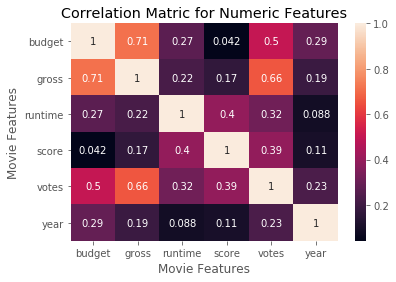

In [14]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [15]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,year_correct
0,8000000,665,54,2192,1,52287414,4661,8,2082,89,8.1,2454,299174,3716,1986,0
1,6000000,1680,54,1296,4,70136369,1821,7,1584,103,7.8,1605,264740,1970,1986,0
2,15000000,1680,54,2645,0,179800601,6203,6,1409,110,6.9,2345,236909,1852,1986,0
3,18500000,2062,54,1066,0,85160248,295,8,1836,137,8.4,2192,540152,1629,1986,0
4,9000000,2122,54,2123,1,18564613,1872,6,1983,90,6.9,1139,36636,2549,1986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,1013,53,1623,4,4750497,230,8,1876,91,5.4,1066,9161,1800,2016,30
6816,0,1914,54,1989,6,28368,3430,7,1550,90,4.9,2146,1959,3008,2016,30
6817,3500000,2124,54,2313,2,3775000,577,8,1897,76,6.5,1355,36333,450,2016,30
6818,0,415,54,1914,6,25981,5272,8,647,76,6.2,1370,6947,2946,2016,30


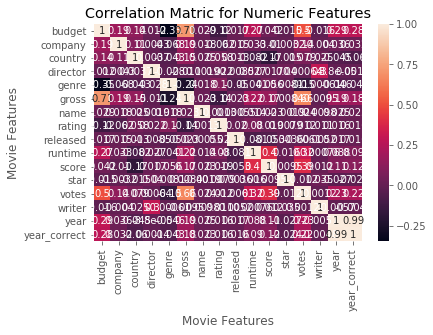

In [16]:
corr_matrix = df_numerized.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [19]:
corr_pairs = df_numerized.corr().unstack()
corr_pairs['gross']
#company was not significant

budget          0.712196
company         0.187220
country         0.149988
director       -0.011429
genre          -0.242676
gross           1.000000
name            0.022768
rating         -0.135538
released        0.022504
runtime         0.224579
score           0.165693
star            0.008382
votes           0.662457
writer         -0.009455
year            0.191548
year_correct    0.179398
dtype: float64

In [25]:
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[ (sorted_pairs) > 0.5]
high_corr

budget        votes           0.503924
votes         budget          0.503924
              gross           0.662457
gross         votes           0.662457
              budget          0.712196
budget        gross           0.712196
year_correct  year            0.991954
year          year_correct    0.991954
budget        budget          1.000000
writer        writer          1.000000
votes         votes           1.000000
star          star            1.000000
score         score           1.000000
runtime       runtime         1.000000
released      released        1.000000
rating        rating          1.000000
name          name            1.000000
gross         gross           1.000000
genre         genre           1.000000
director      director        1.000000
country       country         1.000000
company       company         1.000000
year          year            1.000000
year_correct  year_correct    1.000000
dtype: float64